Experiment 8

In [2]:
def cykParse(w):
    R = {"NP": [["Det", "Nom"]], "Nom": [["AP", "Nom"], ["book"], ["orange"], ["man"]],
         "AP": [["Adv", "A"], ["heavy"], ["orange"], ["tall"]], "Det": [["a"]],
         "Adv": [["very"], ["extremely"]], "A": [["heavy"], ["orange"], ["tall"], ["muscular"]]}
    T = [[set() for _ in w] for _ in w]
    for j, word in enumerate(w):
        for lhs, rhs in R.items():
            for rule in rhs:
                if [word] == rule:
                    T[j][j].add(lhs)
        for i in range(j, -1, -1):
            for k in range(i, j):
                for lhs, rhs in R.items():
                    for rule in rhs:
                        if len(rule) == 2 and rule[0] in T[i][k] and rule[1] in T[k + 1][j]:
                            T[i][j].add(lhs)
    print("True" if "NP" in T[0][-1] else "False")

# Example usage
cykParse("a very tall orange man".split())

True


9 Minimum Edit Distance

In [5]:
def min_edit_distance(source, target):
    m, n = len(source), len(target)
    dp = [[0] * (n + 1) for _ in range(m + 1)]

    for i in range(m + 1):
        for j in range(n + 1):
            if i == 0:
                dp[i][j] = j  # Cost of insertions
            elif j == 0:
                dp[i][j] = i  # Cost of deletions
            else:
                cost = 0 if source[i - 1] == target[j - 1] else 1
                dp[i][j] = min(dp[i - 1][j] + 1,        # Deletion
                               dp[i][j - 1] + 1,        # Insertion
                               dp[i - 1][j - 1] + cost) # Substitution

    return dp[m][n]

# Test inputs
print(min_edit_distance("intention", "execution")) 
print(min_edit_distance("Piece", "Peace"))          

5
2


10. One-Hot Encoding

In [6]:
def one_hot_encode(text):
    vocab = list(set(text.split()))
    return [[1 if word == w else 0 for w in vocab] for word in text.split()]

text = "cat in the hat dog on the mat bird in the tree"
print("One-Hot Encoding:", one_hot_encode(text))


One-Hot Encoding: [[0, 0, 0, 0, 0, 0, 1, 0, 0], [0, 0, 0, 0, 1, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 1, 0], [0, 0, 0, 0, 0, 0, 0, 0, 1], [0, 0, 0, 1, 0, 0, 0, 0, 0], [1, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 1, 0], [0, 0, 0, 0, 0, 1, 0, 0, 0], [0, 1, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 1, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 1, 0], [0, 0, 1, 0, 0, 0, 0, 0, 0]]


11. TF-IDF Computation

In [7]:
from sklearn.feature_extraction.text import TfidfVectorizer

docs = ["The cat in the hat", "The quick brown fox jumps over the lazy dog", 
        "The cat jumped over the fence", "A brown dog jumped over the cat"]
tfidf = TfidfVectorizer()
matrix = tfidf.fit_transform(docs).todense()
print("TF-IDF Matrix:", matrix)
print("Vocabulary:", tfidf.get_feature_names_out())


TF-IDF Matrix: [[0.         0.34134049 0.         0.         0.         0.53477584
  0.53477584 0.         0.         0.         0.         0.
  0.55813643]
 [0.30368769 0.         0.30368769 0.         0.38518933 0.
  0.         0.         0.38518933 0.38518933 0.24586136 0.38518933
  0.40201554]
 [0.         0.33993362 0.         0.53257171 0.         0.
  0.         0.41988565 0.         0.         0.33993362 0.
  0.55583602]
 [0.45888182 0.37150438 0.45888182 0.         0.         0.
  0.         0.45888182 0.         0.         0.37150438 0.
  0.30372918]]
Vocabulary: ['brown' 'cat' 'dog' 'fence' 'fox' 'hat' 'in' 'jumped' 'jumps' 'lazy'
 'over' 'quick' 'the']


Experiment 12: Identify Nouns, Adjectives & Sentiment

In [8]:
import nltk
from textblob import TextBlob

text = '''Learning NLP equips individuals good with skills to analyze vast amounts of textual data.'''
tokens = nltk.pos_tag(nltk.word_tokenize(text))
nouns = " ".join([word for word, tag in tokens if tag in ['NN', 'NNP']])
adjectives = " ".join([word for word, tag in tokens if tag in ['JJ', 'JJR', 'JJS']])

print(f'Nouns: {nouns}')
print(f'Adjectives: {adjectives}')
print(f'Sentiment: {TextBlob(adjectives).sentiment}')


Nouns: NLP
Adjectives: equips good vast textual
Sentiment: Sentiment(polarity=0.35, subjectivity=0.8)


Experiment 13: Sentiment Analysis on vaccination_tweets.csv

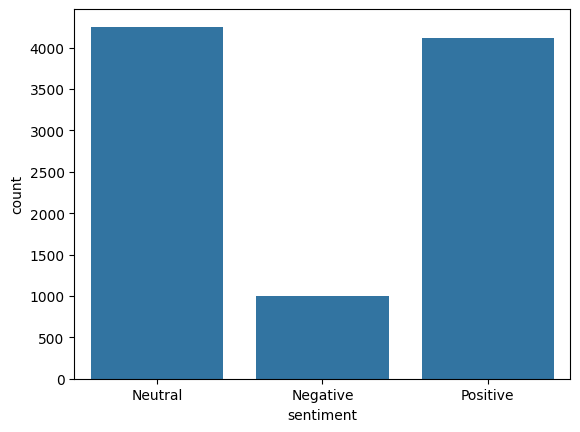

In [16]:
import pandas as pd
from textblob import TextBlob
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('vacination_tweets.csv', encoding='latin1')
df['cleaned_text'] = df['text'].str.lower().str.replace(r'https?://\S+|[^a-z\s]', '', regex=True)
df['polarity'] = df['cleaned_text'].apply(lambda x: TextBlob(x).sentiment.polarity)
df['sentiment'] = df['polarity'].apply(lambda p: 'Positive' if p > 0 else 'Negative' if p < 0 else 'Neutral')

sns.countplot(x='sentiment', data=df)
plt.show()


Experiment 14: SMS Spam Detection

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score

df = pd.read_csv('nlp lab programs/vacination_tweets.csv', usecols=[0, 1], names=['label', 'message'], skiprows=1)
df['message'] = df['message'].str.replace(r'[^\w\s]', '', regex=True).str.lower()
X_train, X_test, y_train, y_test = train_test_split(df['message'], df['label'], test_size=0.2)

vectorizer = CountVectorizer(stop_words='english')
X_train_vec, X_test_vec = vectorizer.fit_transform(X_train), vectorizer.transform(X_test)

model = MultinomialNB().fit(X_train_vec, y_train)
y_pred = model.predict(X_test_vec)

print(f'Accuracy: {accuracy_score(y_test, y_pred):.2f}')
print(classification_report(y_test, y_pred))
